## Creating Own <b style = 'color: orange'>Batch Gradient Descent Model</b>
<b>The "batch" refers to the fact that all data points are processed together in one go</b>

In [285]:
## Importing all the necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

## Setting appreance of graphs
plt.rcParams['figure.figsize'] = [8, 6]
plt.rcParams['font.size'] = 12
plt.rcParams['font.family'] = 'serif'
plt.rcParams['axes.titlesize'] = 20
plt.rcParams['figure.dpi'] = 100
plt.rcParams['axes.titlecolor'] = 'Orange'
plt.rcParams['axes.titleweight'] = 'bold'

<h1 style = 'color: green'><b>For 2D DataSet</b></h1>
<h3 style = 'color : #ccffff'>Creating Dataset</h3>

In [286]:
## setting random seed for reproducibility
# np.random.seed(42)

## Creating X variable (height) for dataset
X = np.random.normal(loc = 170, scale = 10, size = 100)

## Creating Y variable (weight) for dataset having some correlation
Y = X * 0.5 + np.random.normal(loc = 0, scale = 5, size = 100)

## Combining X and Y for Dataframe process
data = np.column_stack((X, Y))
print(data)

[[181.49419728  85.56421906]
 [166.99095981  90.06082248]
 [167.24676776  83.87606296]
 [177.51375987  89.60936611]
 [177.47165224  87.61009348]
 [162.99168321  82.48373622]
 [178.02901618 101.33889627]
 [164.39551849  80.69705782]
 [188.19573047  90.84580006]
 [161.71806019  83.50749576]
 [172.39477462  73.56879414]
 [162.17982363  81.40969575]
 [192.22695629  94.25491363]
 [157.62179056  73.84932895]
 [175.24362747  90.16060209]
 [162.65089586  81.59539002]
 [166.45892359  74.21741726]
 [174.53537834  84.03504156]
 [182.24584438  76.68156616]
 [186.23396562  94.58332938]
 [154.6305204   78.73175729]
 [172.67751224  82.37234665]
 [184.59493603  94.99803158]
 [153.14689061  70.1609522 ]
 [173.14383494  81.73933234]
 [169.97916203  87.07553333]
 [174.14541814  83.6293753 ]
 [162.27695975  80.82519509]
 [155.64381172  75.00366072]
 [150.86893575  73.37981209]
 [179.76383953  88.04579869]
 [181.04049136  86.9864619 ]
 [173.02685349  88.02567532]
 [164.6585165   79.18961582]
 [153.76954107

In [287]:
## Creating DataFrame
df = pd.DataFrame(data, columns= ('height', 'weight'))
df

,height,weight
0,181.494197,85.564219
1,166.990960,90.060822
2,167.246768,83.876063
3,177.513760,89.609366
4,177.471652,87.610093
...,...,...
95,175.995941,81.358380
96,164.928769,85.865712
97,167.636453,89.607301
98,158.120872,76.803388


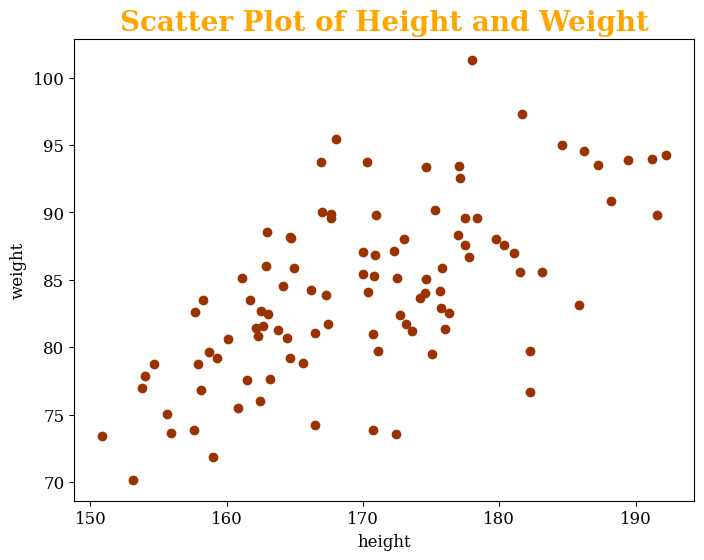

In [288]:
## Creating Scatter Plot for visualzing the relationship
plt.scatter(data = df, x = 'height', y = 'weight', c = '#993300')
plt.title('Scatter Plot of Height and Weight')
plt.xlabel('height')
plt.ylabel('weight')
plt.show()

<h3 style = 'color: orange; font-weight: bold'>Creating Class For <b style = 'color: white'>Grading Descent</b></h3>

<h5 style = 'color : #00cc99'>Before Creating Gradient descent We must need to Know some formulas and it's working process in very essence.</h6>
In my own word, i would say Gradient descent is a technique for gettting the line (or parameters of line) that represents the minimum <b>Cost Funtion</b><br>
Or <br>
That is most perfect fitted line b/w X and Y<br>
<h4 style = 'color: red'><b>Diving into Maths</b></h4>
if the line representing relation b/w height and weight is like :<br>
<b style = 'color: green'>Y</b> = <b style = 'color: orange'>m (slope)</b> * <b style = 'color: green'>X</b> + <b style = 'color = yellow'>b (intercept)</b><br>

Then in that case the loss function (MSE) will be: 
<h5 style = 'color : orange'>MSE = Σ(Yi − Yp)² / n</h5>
Here Yi represnts the actual value of Y at point i<br>
and Yp represents the predicted value by our model at point i<br>
Goint further details Yp = m (slope) * Xi + b<br>
So we can write MSE As<br> <b style = 'color : green'>Σ(Yi − (m * Xi + b))²/n</b> ................. (equation I)


Now if u guys have study Graphs for different kinds of function then u propably remeber that graph for X<sup>2</sup> kind of thing is like that:<br>
Y or f(X) = X<sup>2</sup> then it's graph<br><br>
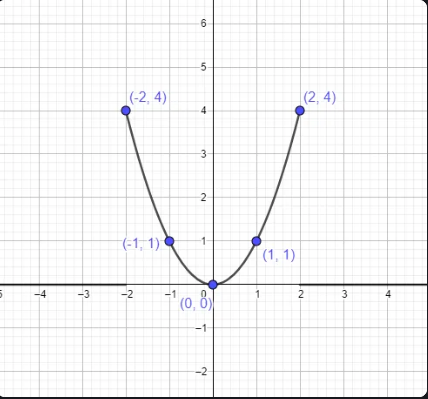<br><br>

similarly if u see then MSE is also a function similar to X<sup>2</sup>. So it's Graph Will also be the same.

<h3 style = 'color : Orange'>What is Our Motive ?</h3>
On this graph we need to find the point where loss is minimum, Simple right?<br>
<img src = 'slope.png' style = 'height: 400px; width: 450px; border-radius: 10px'><br>
But How would we do that?<br>
Since Our Loss function depends on two factors <b style = 'color : orange'>m</b> and <b style = 'color: green'>b</b>.<br>
So we need to find the loss where the slope is near to 0 for both the components.




In [289]:
class myregressor:

    ## Initializing the Instance of the class
    def __init__(self, lr = 0.00001, epochs = 100):
        self.lr = lr
        self.iter = epochs

    ## Function For Providing the data for Training Purpose
    def fit(self, X, Y):
        self.x = np.asarray(X).ravel()
        self.y = np.asarray(Y).ravel()
        self.m = 0
        self.b = 0

        ## iterating for changing the value
        for i in range(self.iter):
            ## value of prediction line
            Yp = self.m * self.x + self.b

            ## checking Loss
            Loss = np.mean(self.y - Yp)
    
            # defining slope related to the components
            m_slope = -2 * np.mean((self.y - Yp) * self.x)
            b_slope = -2 * np.mean(self.y - Yp)
            
            #New value of m and b
            self.m -= self.lr * m_slope
            self.b -= self.lr * b_slope
        print(f'm_slope: {m_slope}, b_slope: {b_slope}')
        print(f"Loss: {Loss}")
        return self

    ## Defining Prediction method
    def pred(self, X):
        return self.m * np.asarray(X).ravel() + self.b
    
myReg = myregressor()
myReg.fit(df.height, df.weight)
yPred = myReg.pred(df.height)


m_slope: 0.000509230104749463, b_slope: -0.0869112969760647
Loss: 0.04345564848803235


Here our m_slope and b_slope are very closed to 0 (although c_slope is still steep to negative direction) means we have almost reached our optimum solution , bravo 😎

<h1 style = 'color : orange'>Comparing MyRegressor To <i style = 'color: green'>Linear Regression</i></h1>
<b>Performance Checking</b>

In [290]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(df[['height']], df.weight, test_size = 0.3)

In [291]:
## Checking On My DataSet

from sklearn.metrics import r2_score
my_model = myregressor().fit(X_train, Y_train)
ypred = my_model.pred(X_test)
r2_score(Y_test, ypred)

m_slope: 0.0006275249191584668, b_slope: -0.10723230550294026
Loss: 0.05361615275147013


0.4015842439385583

In [292]:
## Checking On Linear Model Dataset
from sklearn.linear_model import LinearRegression
LinearModel = LinearRegression().fit(X_train, Y_train)
Ypred = LinearModel.predict(X_test)
r2_score(Y_test, Ypred)


0.3928431374536311

<h3>Let's do this process for 10 times and see their average performance</h3>

In [293]:
myReg = []
Linear = []

for i in range(10):
   ## Splitting Dataset in every loop
   X_train, X_test, Y_train, Y_test = train_test_split(df[['height']], df.weight, test_size = 0.3) 

   #1. For myReg
   my_model = myregressor().fit(X_train, Y_train)
   myRegY = my_model.pred(X_test)
   myReg.append(r2_score(Y_test, myRegY))

   ##2. For Linear Reg
   LinearModel = LinearRegression().fit(X_train, Y_train)
   LinearY = LinearModel.predict(X_test)
   Linear.append(r2_score(Y_test, LinearY))
print(f'myReg Average Performance: {np.mean(myReg)}\n'
      f'Linear Regression Performance: {np.mean(Linear)}')


m_slope: 0.00037123567709167155, b_slope: -0.06345672802054107
Loss: 0.031728364010270536
m_slope: 0.0005503843871914731, b_slope: -0.09399514614935153
Loss: 0.046997573074675766
m_slope: 0.0005758013040316914, b_slope: -0.09784364421525668
Loss: 0.04892182210762834
m_slope: 0.0007202125689251001, b_slope: -0.1234172339304495
Loss: 0.06170861696522475
m_slope: 0.0004853714614130565, b_slope: -0.08326707937324085
Loss: 0.041633539686620424
m_slope: 0.0007793625621941049, b_slope: -0.13386539839713243
Loss: 0.06693269919856622
m_slope: 0.00033713014842078336, b_slope: -0.05746199695014898
Loss: 0.02873099847507449
m_slope: 0.0005589605981112656, b_slope: -0.09567151560793345
Loss: 0.047835757803966726
m_slope: 0.0002498388006261264, b_slope: -0.043126641850326615
Loss: 0.021563320925163307
m_slope: 0.0006649631991617103, b_slope: -0.11345383522876204
Loss: 0.05672691761438102
myReg Average Performance: 0.3287599666681179
Linear Regression Performance: 0.3387869276720833


<h1>Graphical Representation

Now Let's check graphically difference between prediction lines (myRegressor Vs LinearRegressor)

m_slope: 0.000509230104749463, b_slope: -0.0869112969760647
Loss: 0.04345564848803235


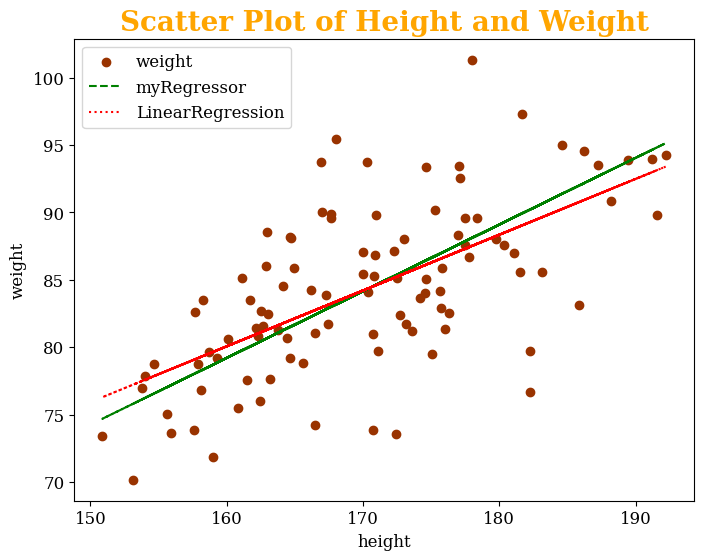

In [294]:
## Fitting the dataset
myReg = myregressor().fit(df.height, df.weight)
LinearModel = LinearRegression().fit(df[['height']], df.weight)

## Getting prediction line for both
myRegY = myReg.pred(df.height)
LinearY = LinearModel.predict(df[['height']])

## Plotting the Graphs
plt.scatter(data = df, x = 'height', y = 'weight', c = '#993300')
plt.plot(df.height, myRegY, 'g--', label = 'myRegressor')
plt.plot(df.height, LinearY, 'r:', label = 'LinearRegression')
plt.title('Scatter Plot of Height and Weight')
plt.legend()
plt.xlabel('height')
plt.ylabel('weight')
plt.show()




## Conclusion: Steps to Creating Our Own Batch Gradient Descent

1. **Understanding the Concept**:
   - We began by learning the fundamentals of gradient descent, focusing on its purpose in minimizing the cost function to find the best-fit line for our data.

2. **Mathematical Foundation**:
   - We explored the mathematical formulation of the Mean Squared Error (MSE) as our loss function, which guided our optimization process.

3. **Setting Up the Environment**:
   - We imported necessary libraries such as NumPy and Pandas to handle data manipulation and mathematical operations.

4. **Data Preparation**:
   - We generated a synthetic dataset with a known relationship between height and weight, ensuring reproducibility by setting a random seed.

5. **Creating the Regressor Class**:
   - We defined a custom class `myregressor` to encapsulate the gradient descent logic, including initialization of parameters (slope and intercept).

6. **Implementing the Fit Method**:
   - We implemented the `fit` method, which iteratively updated the slope and intercept using the calculated gradients, adjusting them based on the learning rate.

7. **Loss Calculation**:
   - During each iteration, we calculated the loss to monitor the model's performance and ensure convergence towards the minimum.

8. **Prediction Method**:
   - We created a `pred` method to make predictions based on the learned parameters, allowing us to evaluate the model's performance on new data.

9. **Comparison with Linear Regression**:
   - We compared our custom implementation with the built-in Linear Regression model from scikit-learn, analyzing the R² scores to assess performance.

10. **Graphical Representation**:
    - We visualized the results through scatter plots, illustrating the prediction lines of both models and highlighting their similarities and differences.

11. **Reflection and Learning**:
    - Through this process, we gained a deeper understanding of the mechanics behind gradient descent and the importance of each component in building a regression model.

<h1 style = 'color: green'><b>For N dimensional Dataset</b></h1>
<h3 style = 'color : #ccffff'>Creating Dataset</h3>

In Real Life Case it is uncommon to have a 2 dimensional Dataset for our project, that's why learning how to work with N dimensional Data become cruicial. <br><br>
So Now Let's Learn BGD for N Dimesional Dataset.

In [295]:
import numpy as np
import pandas as pd

# Set random seed for reproducibility

# Number of rows
n = 100

# Generate feature data
Feature1 = np.random.rand(n) * 100  # Random values between 0 and 100
Feature2 = Feature1 * 0.8 + np.random.randn(n) * 5  # Strong correlation with Feature1
Feature3 = Feature1 * 0.5 + np.random.randn(n) * 3  # Moderate correlation with Feature1
Feature4 = Feature1 * 0.3 + np.random.randn(n) * 2  # Weak correlation with Feature1
Feature5 = Feature1 * 0.2 + np.random.randn(n) * 1  # Weak correlation with Feature1

# Generate target variable as a linear combination of all features
Target = 0.5 * Feature1 + 0.3 * Feature2 + 0.2 * Feature3 + 0.1 * Feature4 + np.random.randn(n) * 3  # Adding some noise

# Create DataFrame
df = pd.DataFrame({
    'Feature1': Feature1,
    'Feature2': Feature2,
    'Feature3': Feature3,
    'Feature4': Feature4,
    'Feature5': Feature5,
    'Target': Target
})

# Show the first few rows of the dataset
df.head()



,Feature1,Feature2,Feature3,Feature4,Feature5,Target
0,71.503872,55.898323,34.080095,20.032404,12.918314,63.199392
1,59.348576,41.039984,25.303775,21.556920,13.410501,50.434922
2,89.572673,65.626782,55.273970,23.110916,17.984083,82.225471
3,58.326652,40.259979,24.773108,18.484340,12.387919,48.527530
4,46.696800,33.124381,30.118654,16.591847,10.097265,42.091465


Now Our Data is 6 Dimensional more like a real world Dataset. <br>
We will try to write code for getting the best fit linear line for our data.
<h4 style = 'color: red'><b>Let's Dive In Maths First</b></h4>
Since We know for n dimensional dataset --<br>
Equation of line (Y) = B+ M<sub>1</sub>X<sub>1</sub>+M<sub>2</sub>X<sub>2</sub>+.......+M<sub>n</sub>X<sub>n</sub><br>
<b style = 'color: orange'>Here B is the intercept and M1, M2,...Mn are the Slopes for each features where X1,X2,...X<sub>n</sub> are the features</b></br>



In [296]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(df.drop('Target', axis = 1), df.Target)

0.9766484802854054

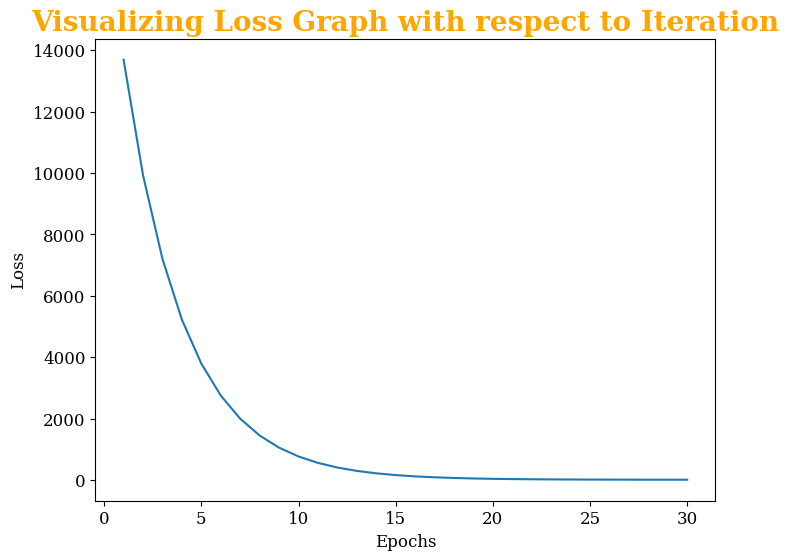

In [307]:
class myNDregressor:
    ## Initializing the class
    def __init__(self, lr = 0.00001, epochs = 30):
        self.lr = lr
        self.iter = epochs
    
    ## Creating method for Fitting the dataset
    def fit(self, X_train, Y_train):
        self.b = 0
        self.slopes = np.ones(X_train.shape[1])
        self.loss = []

        for i in range(self.iter):
            Yp = self.b + np.dot(X_train, self.slopes)
            Loss = np.mean(np.square(Y_train - Yp))
            self.loss.append(Loss)
            b_slope = -2 * np.mean(Y_train - Yp)
            self.b -= self.lr * b_slope

            m_slope = -2 * np.dot((Y_train - Yp), X_train)/X_train.shape[0]
            self.slopes -= self.lr * m_slope
        return self

    def predict(self, X_test):
        return self.b + np.dot(X_test, self.slopes)
    
    def Loss_graph(self):
        iter = np.arange(1, self.iter + 1)
        plt.plot(iter,self.loss)
        plt.title('Visualizing Loss Graph with respect to Iteration')
        plt.xlabel("Epochs")
        plt.ylabel("Loss")
    
    

        
obj = myNDregressor().fit(X_train, Y_train)
YPRED = obj.predict(X_test)
obj.Loss_graph()
r2_score(Y_test, YPRED)

In [298]:
from sklearn.linear_model import LinearRegression
model = LinearRegression().fit(X_train, Y_train)
y = model.predict(X_test)
r2_score(Y_test, y)

0.9851027271450655

<h1 style='color: green'><b>Conclusion: N-Dimensional Batch Gradient Descent</b></h1>

In this exploration of N-dimensional Batch Gradient Descent, we delved into the mathematical foundations and practical implementations necessary for optimizing linear regression models in multi-dimensional datasets. 

### Key Formulas:
1. **Equation of the Linear Model**:
   \[
   Y = B + M_1X_1 + M_2X_2 + \ldots + M_nX_n
   \]
   - Where \(B\) is the intercept, and \(M_1, M_2, \ldots, M_n\) are the slopes corresponding to each feature \(X_1, X_2, \ldots, X_n\).

2. **Loss Function (Mean Squared Error)**:
   \[
   \text{MSE} = \frac{1}{n} \sum_{i=1}^{n} (Y_i - Y_p)^2
   \]
   - This function measures the average squared difference between the actual values \(Y_i\) and the predicted values \(Y_p\).

### Importance:
Understanding and implementing N-dimensional Batch Gradient Descent is crucial for several reasons:
- **Scalability**: It allows us to handle datasets with multiple features, which is common in real-world applications.
- **Optimization**: By minimizing the loss function, we can find the best-fit line that accurately represents the relationship between the features and the target variable.
- **Flexibility**: The method can be adapted to various types of regression problems, making it a versatile tool in machine learning.

### Implementation:
We created the `myNDregressor` class to encapsulate the gradient descent logic:
- **Initialization**: We set the learning rate and the number of epochs.
- **Fitting the Model**: The `fit` method iteratively updates the intercept and slopes using the calculated gradients, adjusting them based on the learning rate.
- **Prediction**: The `predict` method computes the predicted values based on the learned parameters.
- **Loss Visualization**: We included a method to visualize the loss over iterations, providing insight into the convergence of the model.

Through this process, we gained a comprehensive understanding of how to implement Batch Gradient Descent for N-dimensional datasets, reinforcing the importance of mathematical foundations in machine learning.